## **Machine Learning**
---

`AIM`: To  develop a multi label classifier that is capable of detecting different types of toxicity like threats ,obscenity, and identity based hate . We will be developing a model that predicts probability of each type of toxicity for each comment 


---



**DataSet Link** : https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# New Section

# New Section



---

Multi-label classification is a predictive modeling task that involves predicting zero or more mutually non-exclusive class labels
Multi-label classification involves predicting zero or more class labels


---

**Difference Between MultiClass and MultiLabel Classification**
Each input is associated with a single label in MultiClass and in MultiLabel each input can be associated with multiple labels 

# **Preprocessing** 

# New Section

Importing necessary libraries

In [2]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

Loading and exploring the dataset



In [4]:
data_path='./train.csv'

In [5]:
data_raw=pd.read_csv(data_path)

In [6]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 159571
Number of columns in data = 8




**Sample data:**

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
data_raw

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Finding **missing values** in dataset

In [8]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64


In [9]:

data_raw.iloc[:,2:]

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


**Finding number of comments in each category**

In [10]:
data_raw.iloc[:,2:].sum(axis=0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

**Finding the number of clean comments in the dataset**

In [11]:
(data_raw.iloc[:,2:].sum(axis=1)==0).sum(axis=0)

143346

Finding total number of comments , clean comments and Number of comments with labels

**Getting an idea about the distribution of comments in the dataset**


In [12]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [13]:
categories = list(data_raw.columns.values)
categories = categories[2:]
print(categories)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


**Finding Number Of comments in each category**

In [14]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Representing comment distribution in the form of a bar graph




D:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


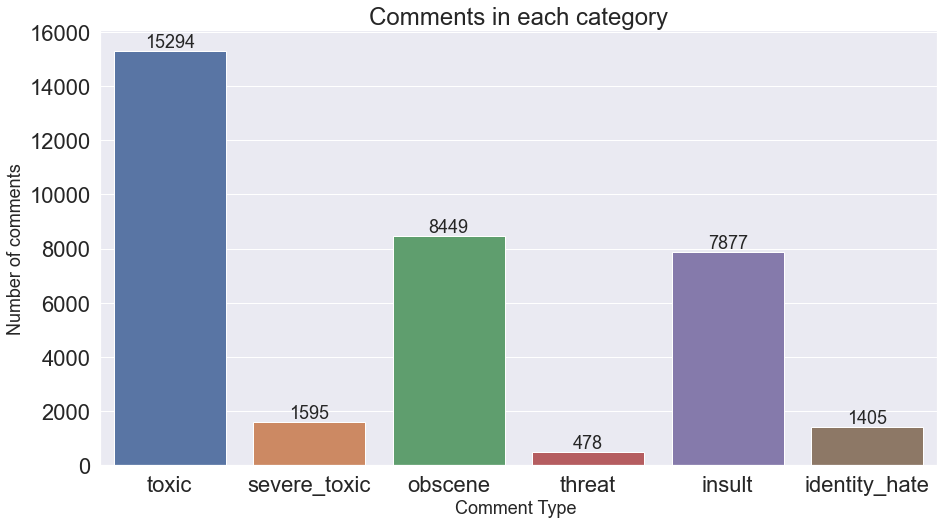

In [15]:

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Comment Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

**Representation Of comments having multiple labels**





***value_counts***() function returns object containing counts of unique values

These represent different labels wrt to comments  and the counts for each of them . For eg: comments with 0 labels (i.e clean comments) have a count of 143346. Similarly the number of comments with 2 labels are 4209

In [16]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
rowSums.value_counts()


0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

Keeping only the comments with labels >=1

In [17]:
rowSums.value_counts()[1:]

1    6360
3    4209
2    3480
4    1760
5     385
6      31
dtype: int64

**Visualizing the distribution of Comments with Multiple Labels**




D:\conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


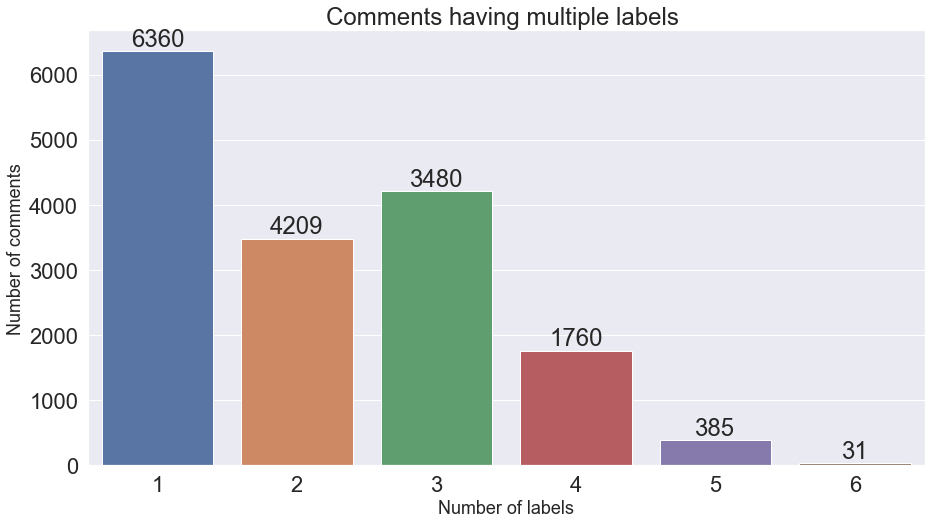

In [18]:
rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

**Generating Word Cloud for Comments**

**Word Cloud** is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud. Word clouds are widely used for analyzing data.



In [19]:
from wordcloud import WordCloud,STOPWORDS


The **Stopwords** are a list of words that are very very common but don't provide useful information for most text analysis procedures

In [20]:
#data_raw[data_raw.toxic==1]

We will be using wordcloud to represent the most commonly used /frequently used words in each type of comments


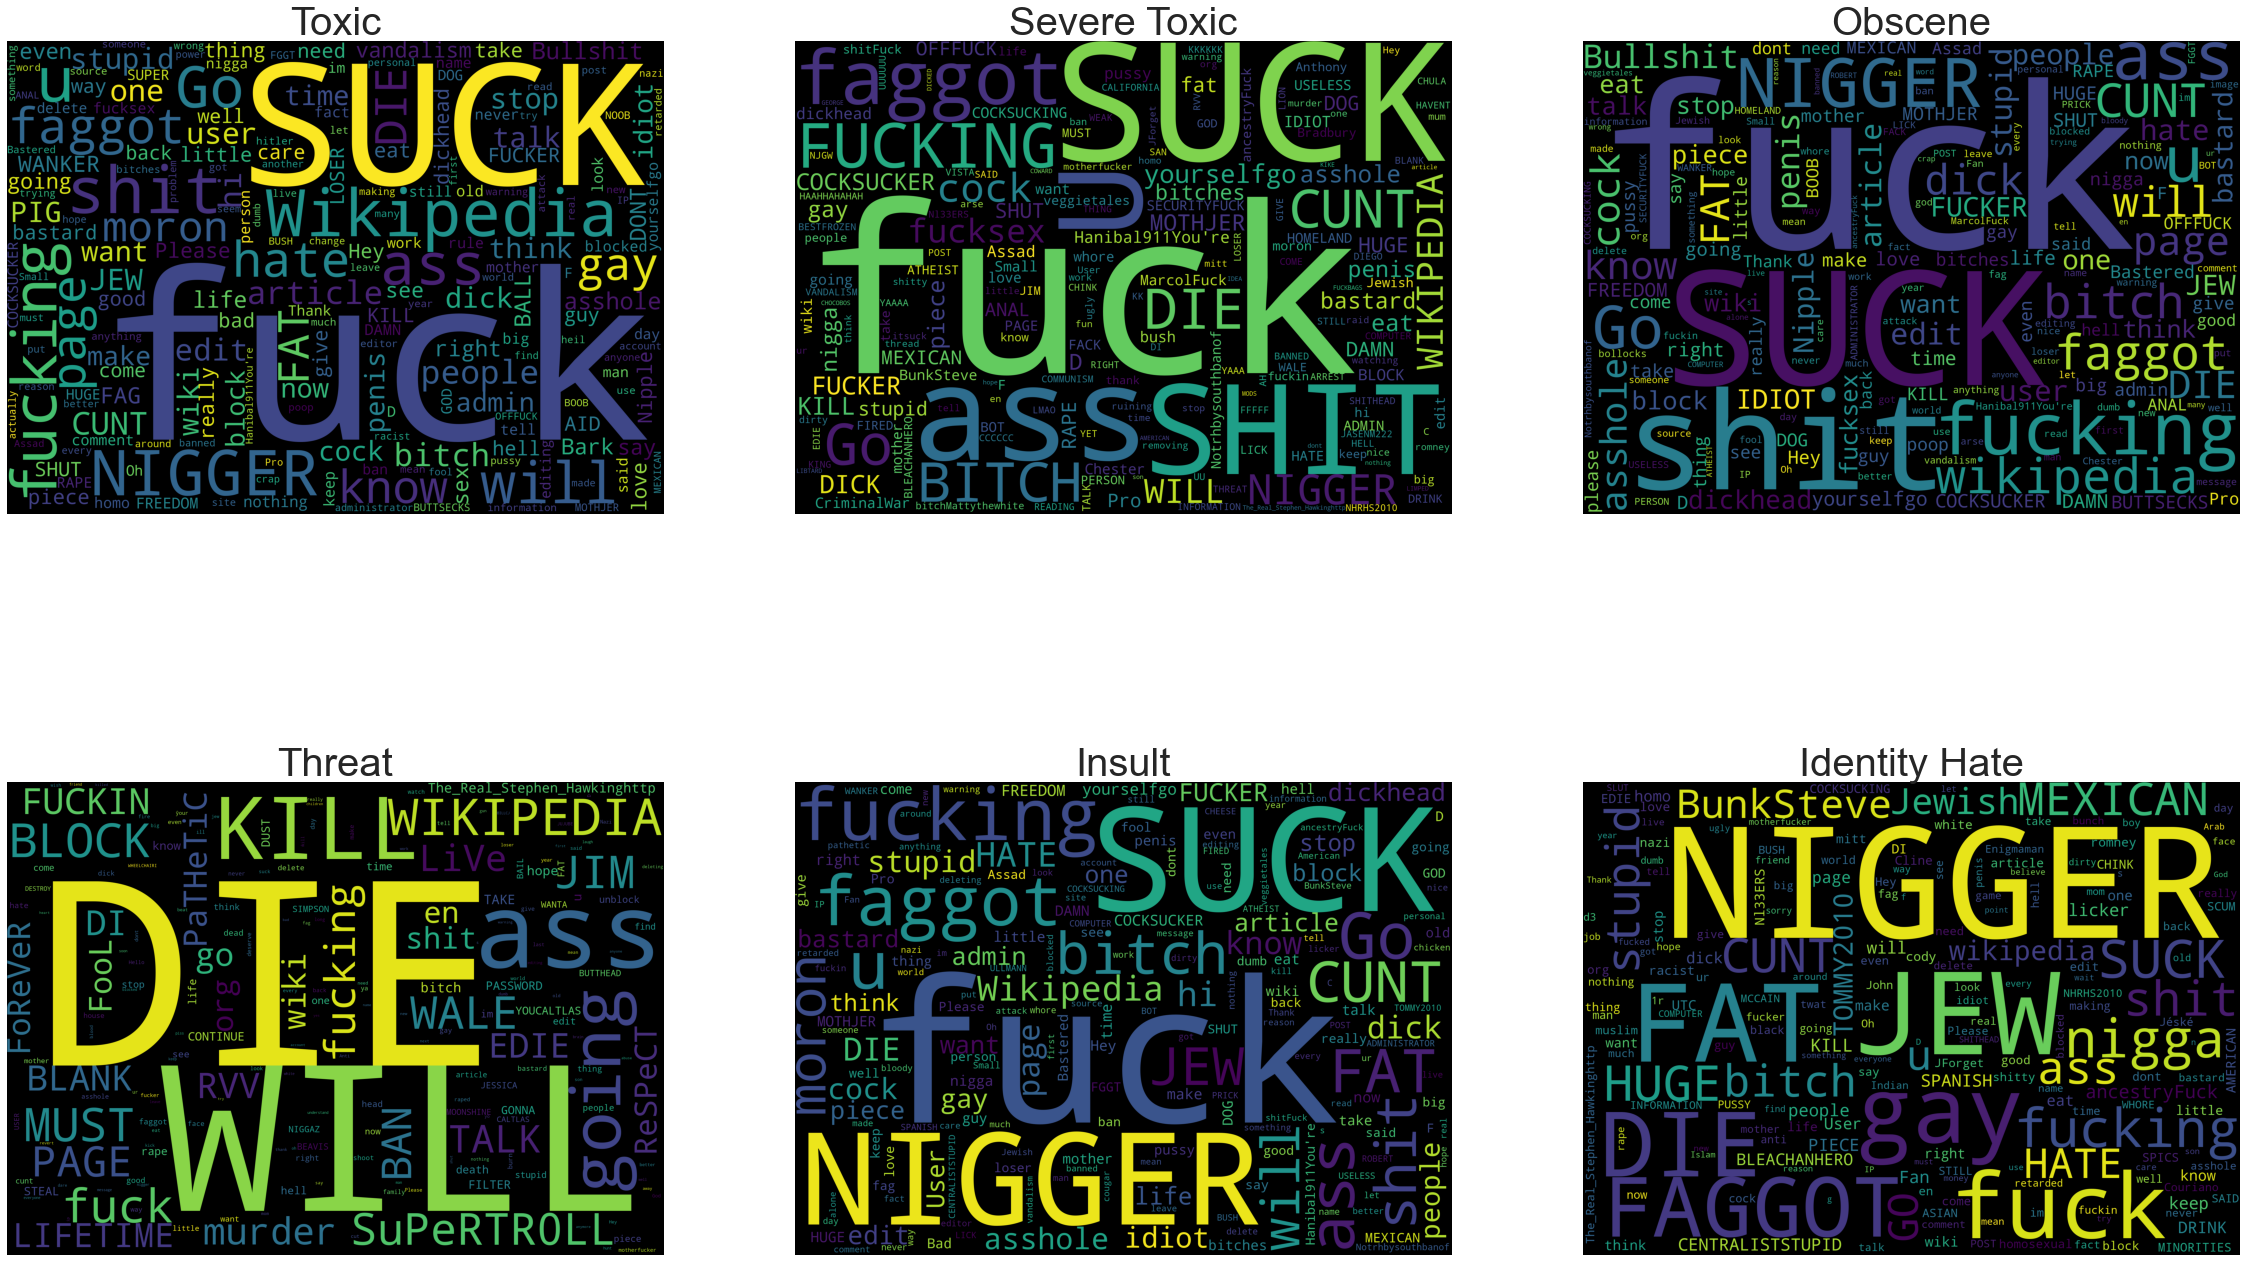

In [21]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# toxic
subset = data_raw[data_raw.toxic==1]
text = subset.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Toxic",fontsize=40)
plt.imshow(cloud_toxic)


# severe_toxic
subset = data_raw[data_raw.severe_toxic==1]
text = subset.comment_text.values
cloud_severe_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 2)
plt.axis('off')
plt.title("Severe Toxic",fontsize=40)
plt.imshow(cloud_severe_toxic)

# obscene
subset = data_raw[data_raw.obscene==1]
text = subset.comment_text.values
cloud_obscene = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 3)
plt.axis('off')
plt.title("Obscene",fontsize=40)
plt.imshow(cloud_obscene)


# threat
subset = data_raw[data_raw.threat==1]
text = subset.comment_text.values
cloud_threat = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 4)
plt.axis('off')
plt.title("Threat",fontsize=40)
plt.imshow(cloud_threat)


# insult
subset = data_raw[data_raw.insult==1]
text = subset.comment_text.values
cloud_insult = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 5)
plt.axis('off')
plt.title("Insult",fontsize=40)
plt.imshow(cloud_insult)


# identity_hate
subset = data_raw[data_raw.identity_hate==1]
text = subset.comment_text.values
cloud_identity_hate = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 6)
plt.axis('off')
plt.title("Identity Hate",fontsize=40)
plt.imshow(cloud_identity_hate)

plt.show()



In [22]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=5000)]
data.shape

(5000, 8)

Importing Necessary **natural language processing** libraries

**SnowballStemmer**- It is a stemming algorithm which is also known as the Porter2 stemming algorithm
**re**- Module for regular Expressions

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

  Function to clean the sentences , find one or more occurances of a question mark

In [24]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


In [25]:
#sample=data.iloc[:,1][94220]+'?' +"ust stop it"
#sample

In [26]:
#cleanHtml(sample)

This function is used to clean the word of any punctuation or special characters

In [27]:
def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

In [28]:
#cleanPunc(sample)

Function to remove extra space from the sentences

In [29]:
def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [30]:
#keepAlpha(sample)

Applying the functions on the dataset

In [31]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanHtml)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2674,072f46094d7fd024,in my opinion who knows how many other...,0,0,0,0,0,0
65762,afe248d743bdd039,idea for talmud articles hi eliyak i am repos...,0,0,0,0,0,0
139198,e901845b60eb7567,rfar against user kainthescion and associated ...,0,0,0,0,0,0
158968,f6880386d4aacfb9,the silver devastation a prod template has b...,0,0,0,0,0,0
139706,eb9cc9bb52c3f75f,im requesting an admin to add the banned tag t...,0,0,0,0,0,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 2674 to 105959
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             5000 non-null   object
 1   comment_text   5000 non-null   object
 2   toxic          5000 non-null   int64 
 3   severe_toxic   5000 non-null   int64 
 4   obscene        5000 non-null   int64 
 5   threat         5000 non-null   int64 
 6   insult         5000 non-null   int64 
 7   identity_hate  5000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 351.6+ KB


Installing the nltk library

In [33]:
import nltk

In [34]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\sajan
[nltk_data]     poudel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [35]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
stop_words

{'a',
 'about',
 'above',
 'across',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'also',
 'am',
 'among',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'beside',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'eight',
 'few',
 'five',
 'for',
 'four',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'may',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'nine',
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'o

Function to remove stopWords

In [36]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2674,072f46094d7fd024,opinion knows many sock meatpuppe...,0,0,0,0,0,0
65762,afe248d743bdd039,idea talmud articles hi eliyak reposting ...,0,0,0,0,0,0
139198,e901845b60eb7567,rfar user kainthescion associated socks sinc...,0,0,0,0,0,0
158968,f6880386d4aacfb9,silver devastation prod template added ...,0,0,0,0,0,0
139706,eb9cc9bb52c3f75f,im requesting admin add banned tag jessica...,0,0,0,0,0,0


In [37]:
for i in data:
  print(i)

id
comment_text
toxic
severe_toxic
obscene
threat
insult
identity_hate


Stemming is used to reduce the words to it's root form

In [38]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [39]:
#stemming(sample)

In [40]:
data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
2674,072f46094d7fd024,opinion know mani sock meatpuppet annoy agrev ...,0,0,0,0,0,0
65762,afe248d743bdd039,idea talmud articl hi eliyak repost follow req...,0,0,0,0,0,0
139198,e901845b60eb7567,rfar user kainthescion associ sock sinc kainth...,0,0,0,0,0,0
158968,f6880386d4aacfb9,silver devast prod templat ad articl silver de...,0,0,0,0,0,0
139706,eb9cc9bb52c3f75f,im request admin add ban tag jessica user page...,0,0,0,0,0,0


Splitting the dataset into training and testing dataset using the train_test_spilt from sklearn module

In [41]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(3500, 8)
(1500, 8)


In [42]:
train_text = train['comment_text']
test_text = test['comment_text']

In [43]:
train_text

50871     oh see im sorri ill fix part commune easi way ...
130691                                  pleas respond quick
34595     mustafa kemal ataturk page interfer suggest ch...
158798                    small chang complet differ sfacet
104278    roflmao im tri edit page let guy know share pr...
                                ...                        
101153    dont frank express reaction said white space c...
136027    tag place mumbojumbo request speedili delet wi...
70452     order ascertain whether articl coi issu scjess...
91548     hi jim move mous delet button think arrog neck...
111674    social promot hi barek agre let talk rather un...
Name: comment_text, Length: 3500, dtype: object

In [44]:
test_text

154507                            redirect talk u open golf
114438                                realli imagin hard me
140296                               excel spell skill note
147922    see repli wikipedia wikiproject histori greec ...
49096       your pussi fairyboy block talk page edit ghandi
                                ...                        
29800                  articl need thorough expand tri best
60152     best player albania erkan play midelfield ofan...
40897     bladesmulti hello consider deliber unblock bla...
144090    want comment communiti sanction noticeboard re...
129324    wikipedia came check see your fine wikipedia n...
Name: comment_text, Length: 1500, dtype: object



---







***Tf-IDF*** Term frequency-inverse document frequency is a text vectorizer that transforms the text into a usable vector. Term frequency represents the number of occurances of a specific term in a document and idf gives the importance of that word in the document . Hence we use the tfidf vectorizer here .

**strip_accents**- Remove accents and perform other character normalization during the preprocessing step. 

**analyzer**- Whether the feature should be made of word or character n-grams

**ngram_range**- The lower and upper boundary of the range of n-values for different n-grams to be extracted.

**norm**- l2 normalisation.

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)
pickle.dump(vectorizer, open('vectorizer.pkl','wb'))


**fit()**: Fit the vectorizer/model to the training data and save the vectorizer/model to a variable

---



---


**transform()**: Use the variable output from fit() to transforme the data

In [46]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['id','comment_text'], axis=1)

x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['id','comment_text'], axis=1)
print(x_test.shape)

(1500, 97139)


In [47]:
y_train

,toxic,severe_toxic,obscene,threat,insult,identity_hate
50871,0,0,0,0,0,0
130691,0,0,0,0,0,0
34595,0,0,0,0,0,0
158798,0,0,0,0,0,0
104278,1,0,0,0,0,0
...,...,...,...,...,...,...
101153,0,0,0,0,0,0
136027,0,0,0,0,0,0
70452,0,0,0,0,0,0
91548,0,0,0,0,1,0




### **MultiLabel Classification**

**from sklearn.linear_model import LogisticRegression** -In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss


**from sklearn.pipeline import Pipeline** - Pipeline of transforms with a final estimator

**from sklearn.metrics import accuracy_score**-In multilabel classification, this function computes subset accuracy

**from sklearn.multiclass import OneVsRestClassifier**- Also known as one-vs-all, this strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes. 






In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix

In [49]:
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])


ONEVSREST
-advantage is interpretability,
-since  each class is represented by one classifier ,it is possible to gain knowledge about the class by nspecting corresponding classifier

'sag'- stocastic average gradient- gradient of loss is estimated and model is updated along the way with constant learning rate

'n_jobs" no of jobs used for computation

In [50]:
#%%time

# Using pipeline for applying logistic regression and one vs rest classifier


for category in categories:
    printmd('**Processing {} comments...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    print('prediction',prediction)
    print("\n")

**Processing toxic comments...**

Test accuracy is 0.9213333333333333
prediction [0 0 0 ... 0 0 0]




**Processing severe_toxic comments...**

Test accuracy is 0.9933333333333333
prediction [0 0 0 ... 0 0 0]




**Processing obscene comments...**

Test accuracy is 0.9573333333333334
prediction [0 0 0 ... 0 0 0]




**Processing threat comments...**

Test accuracy is 0.9973333333333333
prediction [0 0 0 ... 0 0 0]




**Processing insult comments...**

Test accuracy is 0.9653333333333334
prediction [0 0 0 ... 0 0 0]




**Processing identity_hate comments...**

Test accuracy is 0.994
prediction [0 0 0 ... 0 0 0]




**from skmultilearn.problem_transform import ClassifierChain**- Constructs a bayesian conditioned chain of per label classifiers

**from skmultilearn.problem_transform import BinaryRelevance**-
Performs classification per label. Transforms a multi-label classification problem  into L single-label separate binary classification problems using the same base classifier provided in the constructor. The prediction output is the union of all per label classifiers

**from sklearn.naive_bayes import GaussianNB**-
Can perform online updates to model parameters via partial_fit.


In [51]:
# using classifier chains
from skmultilearn.problem_transform import ClassifierChain

from sklearn.linear_model import LogisticRegression

Binary Relavence

ensemble of single label binary classifiers is trained ,union of predicted classes is taken into acc

In [52]:

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")


Accuracy =  0.8826666666666667




Classifier chains

chain of binary classifiers is constructed

In [53]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)


# predict
predictions = classifier.predict(x_test)
print(predictions)
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
#print(predictions,predictions.shape)
print("\n")

  (216, 0)	1.0
  (733, 0)	1.0
  (1311, 0)	1.0
  (1407, 0)	1.0
  (216, 2)	1.0
  (733, 2)	1.0
  (1311, 2)	1.0
  (1407, 2)	1.0
  (216, 4)	1.0
  (733, 4)	1.0
  (1311, 4)	1.0
  (1407, 4)	1.0
Accuracy =  0.914


Wall time: 1min 28s



**from skmultilearn.problem_transform import LabelPowerset**-
Label Powerset is a problem transformation approach to multi-label classification that transforms a multi-label problem to a multi-class problem with 1 multi-class classifier trained on all unique label combinations found in the training data.

In [54]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

LabelPoweset

each member of the powerset of labels in training is taken as single label

In [55]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.9126666666666666


Wall time: 1min 26s


In [56]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

Found existing installation: scikit-learn 0.24.1
Uninstalling scikit-learn-0.24.1:


ERROR: Exception:
Traceback (most recent call last):
  File "D:\conda\lib\site-packages\pip\_internal\cli\base_command.py", line 173, in _main
    status = self.run(options, args)
  File "D:\conda\lib\site-packages\pip\_internal\commands\uninstall.py", line 97, in run
    uninstall_pathset.commit()
  File "D:\conda\lib\site-packages\pip\_internal\req\req_uninstall.py", line 436, in commit
    self._moved_paths.commit()
  File "D:\conda\lib\site-packages\pip\_internal\req\req_uninstall.py", line 287, in commit
    save_dir.cleanup()
  File "D:\conda\lib\site-packages\pip\_internal\utils\temp_dir.py", line 184, in cleanup
    rmtree(self._path)
  File "D:\conda\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 326, in wrapped_f
    return self(f, *args, **kw)
  File "D:\conda\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 406, in __call__
    do = self.iter(retry_state=retry_state)
  File "D:\conda\lib\site-packages\pip\_vendor\tenacity\__init__.py", line 362, in iter


  Successfully uninstalled scikit-learn-0.24.1
  Using cached scikit_learn-0.24.1-cp39-cp39-win_amd64.whl (6.9 MB)


Adapted algorithm 

concentrates on adapting single label classification algorithms to multi-label  by changes in cost/decision function 

In [57]:
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN

from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [58]:
classifier_new = MLkNN(k=10)
# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()
classifier_new.fit(x_train, y_train)

pickle.dump(classifier, open('model.pkl','wb'))
# predict
predictions_new = classifier_new.predict(x_test)
print(predictions_new.toarray())
# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")

# train



[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 ...
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
Accuracy =  0.9113333333333333




In [59]:
message = "fuck you bitch"
message = cleanHtml(message)
message = cleanPunc(message)
message = keepAlpha(message)
message = removeStopWords(message)
message = stemming(message)
data = [message]
data = vectorizer.transform(data)
print(data.shape)
my_prediction = classifier_new.predict(data)
print(my_prediction.toarray())

(1, 97139)
[[0 0 0 0 0 0]]
